<a href="https://colab.research.google.com/github/YuLiuPotato/Comp2021Project/blob/master/AP40012_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AP40012 Project
Group 1

(Some rough idea, please also try something you want to try)


In [2]:
# used packages in the project
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [3]:
covid_raw = pd.read_csv('covid_19_data.csv')
covid_raw.info()

FileNotFoundError: ignored

In [ ]:
region_name = "Hong Kong"
covid = covid_raw.loc[covid_raw['Province/State'] == region_name]
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 12 to 45716
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              150 non-null    int64  
 1   ObservationDate  150 non-null    object 
 2   Province/State   150 non-null    object 
 3   Country/Region   150 non-null    object 
 4   Last Update      150 non-null    object 
 5   Confirmed        150 non-null    float64
 6   Deaths           150 non-null    float64
 7   Recovered        150 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ KB


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12,13,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
50,51,01/23/2020,Hong Kong,Hong Kong,1/23/20 17:00,2.0,0.0,0.0
109,110,01/24/2020,Hong Kong,Hong Kong,1/24/20 17:00,2.0,0.0,0.0
149,150,01/25/2020,Hong Kong,Hong Kong,1/25/20 17:00,5.0,0.0,0.0
192,193,01/26/2020,Hong Kong,Hong Kong,1/26/20 16:00,8.0,0.0,0.0


In [ ]:
col_n = ['Confirmed','Deaths','Recovered']
HK = pd.DataFrame(covid,columns = col_n)
HK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 12 to 45716
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  150 non-null    float64
 1   Deaths     150 non-null    float64
 2   Recovered  150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


In [ ]:
def generateCsv(df, file_name, move_forward = 0): # generate csv file
    # use the data of day x as dependent variables(Y-vairables)
    # data of day (x-moveForward) to day (x-1) will be the X-vairables
    tempArray = np.array(df)
    start_day_index = move_forward
    with open(file_name+'.csv','w') as output:
        write_c = lambda x: output.write(str(x)+',')
        write_n = lambda x: output.write(str(x)+'\n')
        Range = lambda x: range(x+1)
        def new_label(label, day):
            if (day == move_forward):
                return label
            else:
                return label+'_'+str(move_forward-day)+'_day(s)_ago'
        # first line
        for _ in Range(move_forward):
            write_c(new_label('Infected',_))
            write_c(new_label('Confirmed',_))
            write_c(new_label('Deaths',_))
            if ( _ == move_forward):
                write_n(new_label('Recovered',_))
            else:
                write_c(new_label('Recovered',_))
        # data
        for index in range(start_day_index,len(tempArray)):
            for _ in Range(move_forward):
                write_c(tempArray[index-move_forward+_][0]-tempArray[index-move_forward+_][1]-tempArray[index-move_forward+_][2])
                write_c(tempArray[index-move_forward+_][0])
                write_c(tempArray[index-move_forward+_][1])
                if ( _ == move_forward):
                    write_n(tempArray[index-move_forward+_][2])
                else:
                    write_c(tempArray[index-move_forward+_][2]) 

In [ ]:
generateCsv(HK,'HK_new',5)

In [ ]:
df = pd.read_csv('HK_new.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Infected_5_day(s)_ago   145 non-null    float64
 1   Confirmed_5_day(s)_ago  145 non-null    float64
 2   Deaths_5_day(s)_ago     145 non-null    float64
 3   Recovered_5_day(s)_ago  145 non-null    float64
 4   Infected_4_day(s)_ago   145 non-null    float64
 5   Confirmed_4_day(s)_ago  145 non-null    float64
 6   Deaths_4_day(s)_ago     145 non-null    float64
 7   Recovered_4_day(s)_ago  145 non-null    float64
 8   Infected_3_day(s)_ago   145 non-null    float64
 9   Confirmed_3_day(s)_ago  145 non-null    float64
 10  Deaths_3_day(s)_ago     145 non-null    float64
 11  Recovered_3_day(s)_ago  145 non-null    float64
 12  Infected_2_day(s)_ago   145 non-null    float64
 13  Confirmed_2_day(s)_ago  145 non-null    float64
 14  Deaths_2_day(s)_ago     145 non-null    fl

,Infected_5_day(s)_ago,Confirmed_5_day(s)_ago,Deaths_5_day(s)_ago,Recovered_5_day(s)_ago,Infected_4_day(s)_ago,Confirmed_4_day(s)_ago,Deaths_4_day(s)_ago,Recovered_4_day(s)_ago,Infected_3_day(s)_ago,Confirmed_3_day(s)_ago,Deaths_3_day(s)_ago,Recovered_3_day(s)_ago,Infected_2_day(s)_ago,Confirmed_2_day(s)_ago,Deaths_2_day(s)_ago,Recovered_2_day(s)_ago,Infected_1_day(s)_ago,Confirmed_1_day(s)_ago,Deaths_1_day(s)_ago,Recovered_1_day(s)_ago,Infected,Confirmed,Deaths,Recovered
0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,5.0,5.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0
1,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,5.0,5.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0
2,2.0,2.0,0.0,0.0,5.0,5.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,10.0,10.0,0.0,0.0
3,5.0,5.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,10.0,0.0,0.0
4,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,10.0,0.0,0.0,12.0,12.0,0.0,0.0


In [ ]:
infectant_df = pd.DataFrame( df ,columns = ['Infected'])
confirm_df = pd.DataFrame( df ,columns = ['Confirmed'])
death_df = pd.DataFrame( df ,columns = ['Deaths'])
recover_df = pd.DataFrame( df ,columns = ['Recovered'])
infectant_ar = np.c_[infectant_df]
confirm_ar = np.c_[confirm_df]
death_ar = np.c_[death_df]
recover_ar = np.c_[recover_df]
days = np.array(range(1,np.size(confirm_ar)+1))

(145, 1)


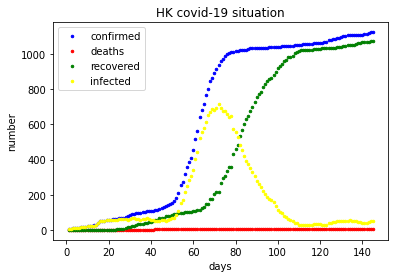

In [ ]:
plt.plot(days,confirm_ar,marker='.',lw=0,c='blue',ms=5,label='confirmed')
plt.plot(days,death_ar,marker='.',lw=0,c='red',ms=5,label='deaths')
plt.plot(days,recover_ar,marker='.',lw=0,c='green',ms=5,label='recovered')
plt.plot(days,infectant_ar,marker='.',lw=0,c='yellow',ms=5,label='infected')
plt.title("HK covid-19 situation")
plt.xlabel('days')
plt.ylabel('number')
plt.legend()
plt.show()

In [ ]:
X = np.array(df.iloc[:,list(range(20))])
print(X.shape)

(145, 20)


In [ ]:
model = LinearRegression()
model.fit(X,infectant_ar)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model.predict(X)

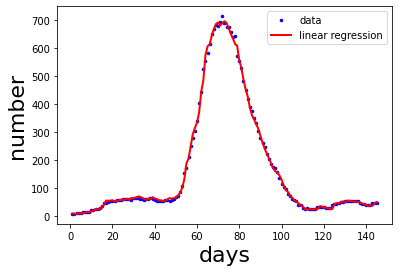

In [ ]:
plt.plot(days,infectant_ar,marker='.',lw=0,c='b',ms=5,label='data')
plt.plot(days,y_predict,marker='o',ms=0,lw=2,color='r',label='linear regression')
plt.xlabel('days',fontsize=22)
plt.ylabel('number',fontsize=22)
plt.legend()
plt.show()

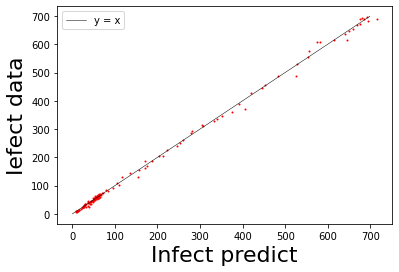

In [ ]:
plt.plot(infectant_ar,y_predict,marker='.',color='r',lw=0.0,ms=2.0)
plt.plot(range(700),range(700),color='k',lw=0.5,label='y = x')
plt.xlabel('Infect predict',fontsize=22)
plt.ylabel('Iefect data',fontsize=22)
plt.legend()
plt.show()

In [ ]:
def r2(y,Y):
  m = len(y)
  mu = np.mean(y)
  ss_res = 0
  ss_tot = 0
  for i in range(m):
    ss_res += (y[i]-Y[i])**2
    ss_tot += (y[i]-mu)**2
  return 1-ss_res/ss_tot
print((r2(infectant_ar,y_predict)))

[0.99827656]
